In [17]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import pickle
import base64
from collections import defaultdict
import glob
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size':20})

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

### Read data

In [12]:
BASE_DIR = "./data/train_stress/"
gpu_data = pd.read_csv(BASE_DIR + "node_gpu_0.csv", header=None, names=["timestamp", "id", "load", "memoryTotal", "memoryUsed"])

In [13]:
train_files = glob.glob(BASE_DIR + "*_train_times.csv")
print(train_files)
train_data = {}
for file_path in train_files:
    model_id = file_path.split('/')[-1].split('_')[0]
    train_data[model_id] = pd.read_csv(file_path, header=None, names=["timestamp", "total_time", "timetaken_beforetask", "timetaken_traintask", "timetaken_aftertask"])

['./data/train_stress/10_train_times.csv', './data/train_stress/1_train_times.csv', './data/train_stress/9_train_times.csv', './data/train_stress/11_train_times.csv', './data/train_stress/2_train_times.csv', './data/train_stress/7_train_times.csv', './data/train_stress/6_train_times.csv', './data/train_stress/5_train_times.csv', './data/train_stress/4_train_times.csv', './data/train_stress/8_train_times.csv', './data/train_stress/3_train_times.csv']


In [14]:
gpu_timestamps = gpu_data["timestamp"]
gpu_load = gpu_data["load"]

In [15]:
start_timestamp = min([min(d["timestamp"]) for d in train_data.values()] + [min(gpu_timestamps)])

Text(0.5,1,'Train-train Resnet18 contention test, total jobs before OOM: 11')

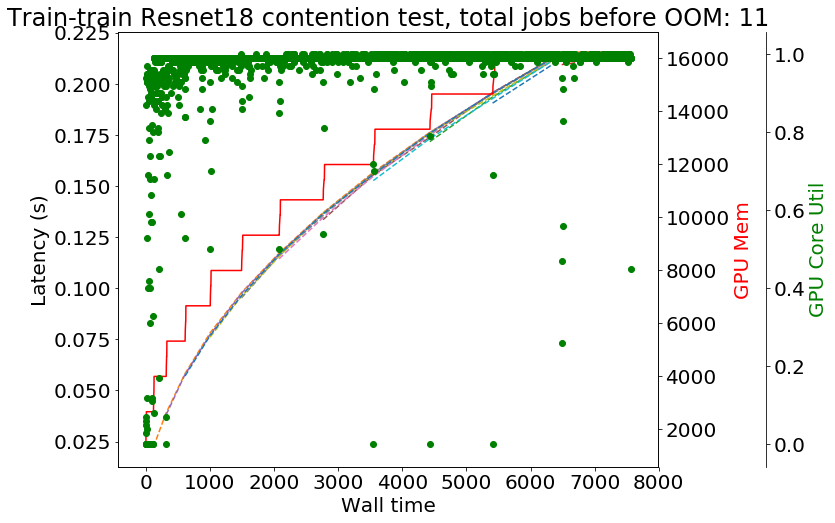

In [26]:
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=0.75)

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(ax3)
ax3.spines["right"].set_visible(True)

for model_id, data in train_data.items():
    data["timestamp"]
    p1, = ax1.plot(data["timestamp"] - start_timestamp, data["total_time"]/5000, "--", label=str(model_id))
memplot, = ax2.plot(gpu_data["timestamp"] - start_timestamp, gpu_data["memoryUsed"], "r-", label="GPU Mem")
coreplot = ax3.scatter(gpu_data["timestamp"] - start_timestamp, gpu_data["load"], color='g',label="GPU Load")

ax1.set_xlabel("Wall time")
ax1.set_ylabel("Latency (s)")
ax2.set_ylabel("GPU Mem")
ax3.set_ylabel("GPU Core Util")

ax2.yaxis.label.set_color(memplot.get_color())
ax3.yaxis.label.set_color('g')

plt.title("Train-train Resnet18 contention test, total jobs before OOM: {}".format(len(train_data)))

# ax1 = fig.add_subplot(111)
# ax1.plot(infer_timestamps, infer_accuracy_data, marker='*')
# ax1.plot(gpu_timestamps, gpu_load, 'g-')
# # for c, c_data in infer_accuracy_per_class.items():
# #     ax1.plot(infer_timestamps, c_data, marker='*')
# ax1.set_ylabel('infer_accuracy (%)')

# ax2 = ax1.twinx()
# ax2.plot(infer_timestamps, infer_latency_data, 'r-', marker='o')
# ax2.set_ylabel('per sample infer_latency (ms)', color='r')
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')
    
# plt.xlabel("Wall time")

### Scaling

[]

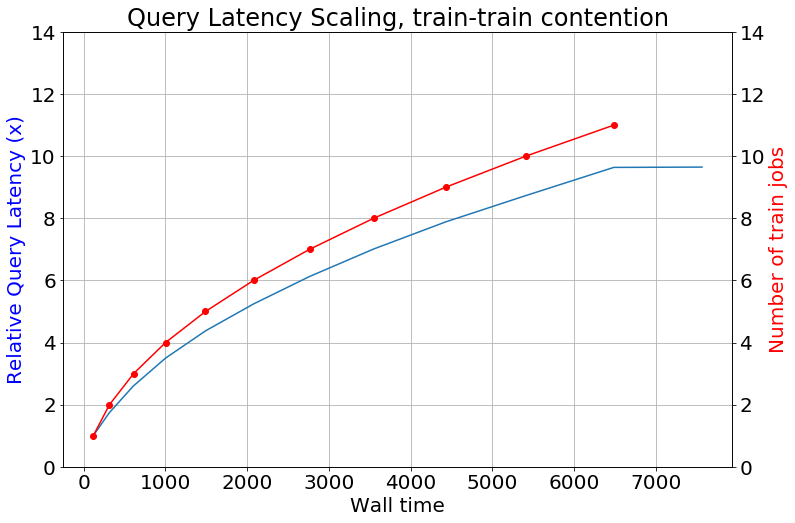

In [20]:
data = train_data["1"]
job_start_times = sorted([min(data["timestamp"] - start_timestamp) for data in train_data.values()])
job_ctr = range(1,len(job_start_times)+1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(data["timestamp"] - start_timestamp, data["total_time"]/min(data["total_time"]))
ax2.plot(job_start_times, job_ctr, 'r-', marker='o')


ax1.set_xlabel("Wall time")
ax1.set_ylabel("Relative Query Latency (x)")
ax1.yaxis.label.set_color('b')
ax2.set_ylabel("Number of train jobs")
ax2.yaxis.label.set_color('r')
ax1.grid()

ax1.set_ylim([0,14])
ax2.set_ylim([0,14])

plt.title("Query Latency Scaling, train-train contention")
plt.plot()

[]

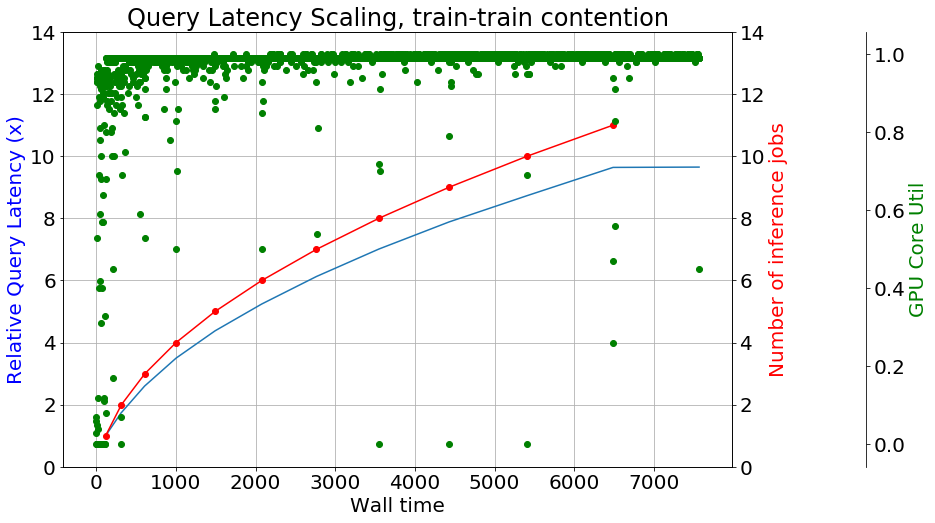

In [25]:
data = train_data["1"]
job_start_times = sorted([min(data["timestamp"] - start_timestamp) for data in train_data.values()])
job_ctr = range(1,len(job_start_times)+1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(ax3)
ax3.spines["right"].set_visible(True)

ax1.plot(data["timestamp"] - start_timestamp, data["total_time"]/min(data["total_time"]))
ax2.plot(job_start_times, job_ctr, 'r-', marker='o')
ax3.scatter(gpu_data["timestamp"] - start_timestamp, gpu_data["load"], color='g',label="GPU Load")


ax1.set_xlabel("Wall time")
ax1.set_ylabel("Relative Query Latency (x)")
ax1.yaxis.label.set_color('b')
ax2.set_ylabel("Number of inference jobs")
ax2.yaxis.label.set_color('r')
ax1.grid()
ax3.set_ylabel("GPU Core Util")
ax3.yaxis.label.set_color('g')

ax1.set_ylim([0,14])
ax2.set_ylim([0,14])

plt.title("Query Latency Scaling, train-train contention")
plt.plot()